# Bayesian Statistics With Baseball Data: Priors and Posteriors

![Vladimir Guerrero Jr.](https://imgur.com/6ckQwnC.jpg)

In [20]:
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Bayesian Analysis of Batting Averages

###  Let's load in our data.

In [6]:
df = pd.read_csv('data/career_hits.csv')

df.head()

,name,hits,at_bat,average
0,Hank Aaron,3771,12364,0.304998
1,Tommie Aaron,216,944,0.228814
2,Andy Abad,2,21,0.095238
3,John Abadie,11,49,0.224490
4,Ed Abbaticchio,772,3044,0.253614


### How about we check out the top and bottom three hitters according to their average...

In [7]:
df.sort_values('average', ascending=False)[:3]

,name,hits,at_bat,average
5853,John Mohardt,1,1,1.0
9303,Al Wright,1,1,1.0
359,Jeff Banister,1,1,1.0


In [8]:
df.sort_values('average', ascending=True)[:3]

,name,hits,at_bat,average
1494,Larry Ciaffone,0,5,0.0
7303,Jay Rogers,0,8,0.0
2552,Ferd Eunick,0,2,0.0


Hitters batting 1.000 and 0?

Because there's no minimum at-bats, the data is heavily skewed by outliers.

### Let's set up a prior distribution to represent our belief about batting average.

[After doing a quick search online](https://www.google.com/search?q=average+batting+average+for+players+mlb&oq=average+batting+average+for+players+mlb&aqs=chrome..69i57j0.7373j0j4&sourceid=chrome&ie=UTF-8), it looks like the overall batting average for MLB baseball players is around 0.260.

**Let's make it simple and say that our prior belief is that, out of 100 at-bats, we’ve seen 26 hits. We'll set up a beta distribution with `alpha=27` and `beta=75`.**

This is our distribution of beliefs on the batting average (probability of hitting while at bat) for MLB players.

In [16]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

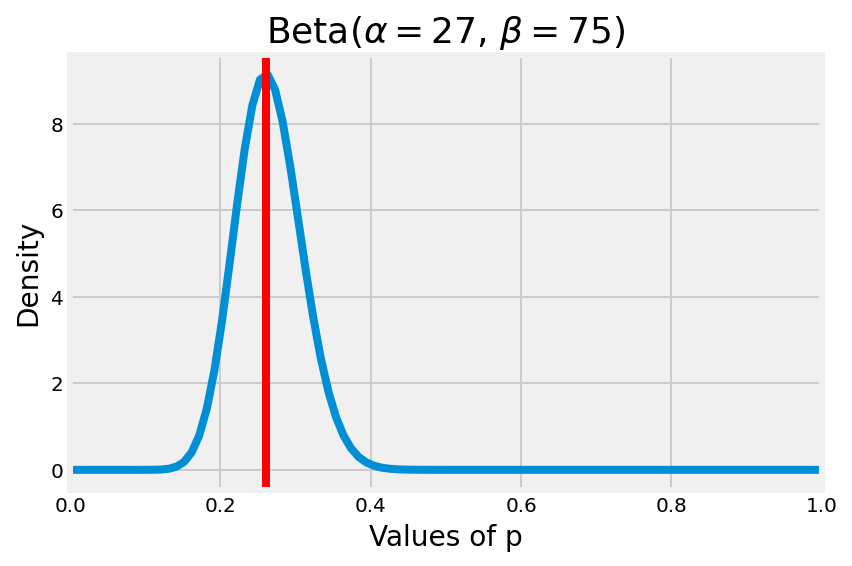

In [21]:
#Setting up alpha and beta based on requirements above:
a = 27
b = 75

# This is the 0th percentile of our beta distribution:
lower = beta.ppf(0, a, b)

# This is the 100th percentile of our beta distribution:
upper = beta.ppf(1, a, b)

# Generate 100 x values in the appropriate range to use for plotting:
x = np.linspace(lower, upper, 100)

plt.plot(x,
         beta(a,b).pdf(x))

# Plot batting averages:
plt.ylabel('Density', fontsize=14)
plt.xlim((lower,upper))
plt.xlabel('Values of p', fontsize=14)
plt.title(r'Beta($\alpha=27$, $\beta=75$)', fontsize=18)
plt.axvline(0.26, c='r');

### Calculating the maximum a posteriori (MAP) estimate of players' batting averages.

The maximum a posteriori (MAP) estimate is the mode of a posterior distribution for a statistical parameter.

In our case, the MAP estimate for our players' batting averages will be the mode of the posterior beta distribution we get from updating our prior distribution with their at bats and hits.

We need to update our beta distribution’s prior belief about batting averages with a player's at-bat and hit information to get a _new_ beta posterior distribution for that player's batting average. 

Luckily, with the beta distribution, the update is just a matter of adding in our new observations to the alpha and beta parameters, where alpha is the number of hits and beta is the number of misses/strikes:

    observed_hits = n_hits
    observed_misses = n_misses
    beta_prior = Beta(prior_hits+1, prior_misses+1)
    beta_posterior = Beta(prior_hits + n_nits + 1, prior_misses + n_misses + 1)
    
For each player, we'll update the prior to the posterior distribution and calculate the mode of the distribution. 

The mode of a beta distribution is conveniently defined as:

### $$ \frac{\alpha - 1}{\alpha + \beta -2} $$

Which means we don't even need to use SciPy's beta distribution function. 

We can just calculate the new alpha (hits) and beta (misses) for each player's posterior beta distribution and plug them into the formula above to get the MAP estimate of batting the average.

In [11]:
modes = []
for i in range(len(df)):
    a = 27
    b = 75
    mode = (a+df.hits[i]-1)/((a+df.hits[i])+(b+df.at_bat[i] - df.hits[i])-2)
    modes.append(mode)
df['MAP'] = modes
df.head()

,name,hits,at_bat,average,MAP
0,Hank Aaron,3771,12364,0.304998,0.304637
1,Tommie Aaron,216,944,0.228814,0.231801
2,Andy Abad,2,21,0.095238,0.231405
3,John Abadie,11,49,0.224490,0.248322
4,Ed Abbaticchio,772,3044,0.253614,0.253817


### Let's look up the top and bottom batters according to the MAP estimate.

In [12]:
df.sort_values('MAP', ascending=False)[:5]

,name,hits,at_bat,average,MAP
3938,Rogers Hornsby,2930,8173,0.358497,0.357307
4118,Shoeless Joe Jackson,1772,4981,0.355752,0.353867
2109,Ed Delahanty,2596,7505,0.345903,0.344773
3475,Billy Hamilton,2158,6268,0.344288,0.342965
3663,Harry Heilmann,2660,7787,0.341595,0.340560


In [13]:
df.sort_values('MAP', ascending=True)[:5]

,name,hits,at_bat,average,MAP
4031,John Humphries,52,364,0.142857,0.168103
4322,Mike Jordan,12,125,0.096000,0.168889
2987,Ed Gastfield,6,88,0.068182,0.170213
3113,Buck Gladmon,56,380,0.147368,0.170833
598,Bill Bergen,516,3028,0.170410,0.173274


### Let's plot the MLE batting average against the MAP batting average.

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


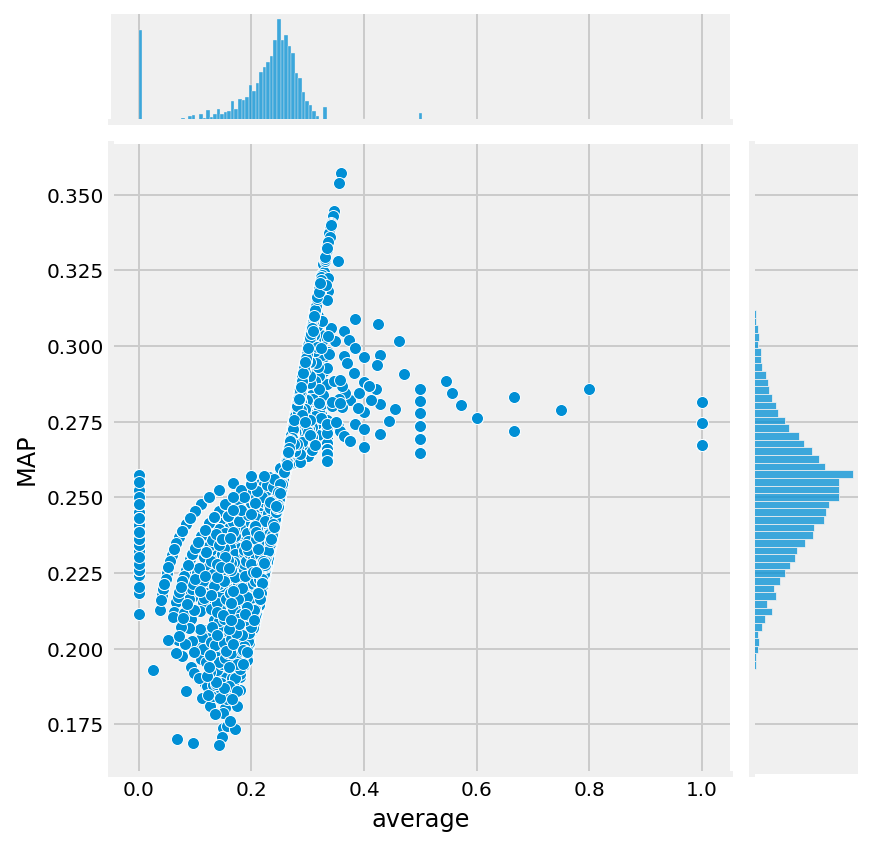

In [22]:
sns.jointplot('average', 'MAP', data=df);